## **Fashion MNIST Classification with PyTorch**

## **1. Import Required Libraries**

In [21]:
# Import pandas for data manipulation
import pandas as pd

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Import train_test_split for splitting data
from sklearn.model_selection import train_test_split

# Import torch and related modules for deep learning
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

## **2. Set Random Seed**
Set the random seed for reproducibility of results.

In [22]:
# Set random seed for reproducibility
torch.manual_seed(42)

## **3. Load and Inspect Dataset**
Load the Fashion MNIST dataset from a CSV file and inspect its structure.

In [23]:
# Load Fashion MNIST dataset from CSV file
df = pd.read_csv('fmnist_small.csv')

# Display first few rows
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [24]:
# Show info about the DataFrame (columns, types, nulls)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 35.9 MB


## **4. Visualize Sample Images**
Display a grid of the first 16 images from the dataset to understand the data visually.

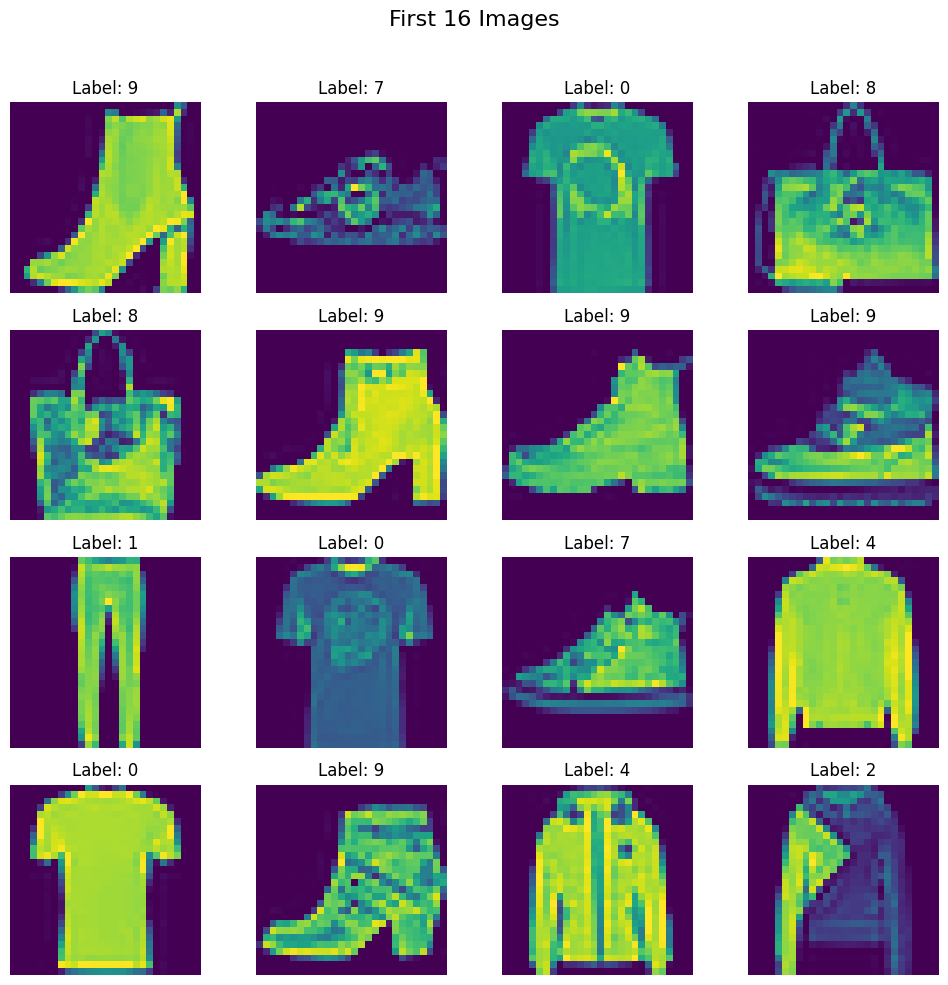

In [25]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(
    4, 
    4, 
    figsize=(10, 10)
)

fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    # Get image data and reshape to 28x28
    img = df.iloc[i, 1:].values.reshape(28, 28)
    # Show image in grayscale
    ax.imshow(img)
    # Hide axis for cleaner look
    ax.axis('off')
    # Show label as title
    ax.set_title(f"Label: {df.iloc[i, 0]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title
plt.show()

## **5. Train-Test Split**
Split the dataset into training and testing sets

In [26]:
# Split features and labels
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

## **6. Feature Scaling**
Scale the pixel values to the [0, 1] range for better model performance.

In [27]:
# Scale features to [0, 1] range
X_train = X_train/255.0
X_test = X_test/255.0

## **7. Steps Overview**
A summary of the steps involved in building and training the neural network.

## **STEPS**

- ***Creating a CustomDataset Class***
- ***Creating train_dataset object***
- ***Creating test_dataset object***
- ***Creating train and test loader***
- ***Define Neural Network Class***
- ***Setting Learning Rate And Epochs***
- ***Instantiating The Model***
- ***Loss Function***
- ***Optimizer***
- ***Impliment Training Loop***
    - ***forward pass***
    - ***Loss Calculation***
    - ***Backward pass***
    - ***Updating Gradients***
- ***Set Model To eval Mode***
- ***Perform Evaluation***

## **8. Define Custom Dataset Class**
Create a custom PyTorch Dataset class to handle feature and label access for batching.

In [28]:
# Define CustomDataset class for PyTorch
class CustomDataset(Dataset):

    def __init__(self, features, labels):
        # Convert features to float tensor
        self.features = torch.tensor(features, dtype=torch.float32)
        
        # Convert labels to long tensor
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        # Return number of samples
        return len(self.features)

    def __getitem__(self, index):
        # Return feature and label at given index
        return self.features[index], self.labels[index]

## **9. Create Dataset Instances**
Instantiate training and testing datasets using the custom Dataset class.

In [29]:
# Create train_dataset and test_dataset objects
train_dataset = CustomDataset(
    X_train, 
    y_train
)

test_dataset = CustomDataset(
    X_test, 
    y_test
)

## **10. DataLoader for Batching**
Wrap the datasets with PyTorch DataLoader to enable efficient batching and shuffling during training and evaluation.

In [30]:
# Create DataLoader for training and testing
train_loader = DataLoader(
    train_dataset, 
    batch_size=32, 
    shuffle=True
)

test_loader = DataLoader(
    test_dataset, 
    batch_size=32, 
    shuffle=False
)

In [31]:
# Display the number of batches in the train DataLoader.
len(train_loader)

150

In [32]:
# Display the number of batches in the test DataLoader.
len(test_loader)

38

## **11. Neural Network Architecture**
Define the architecture of the artificial neural network using PyTorch's nn.Module and nn.Sequential.

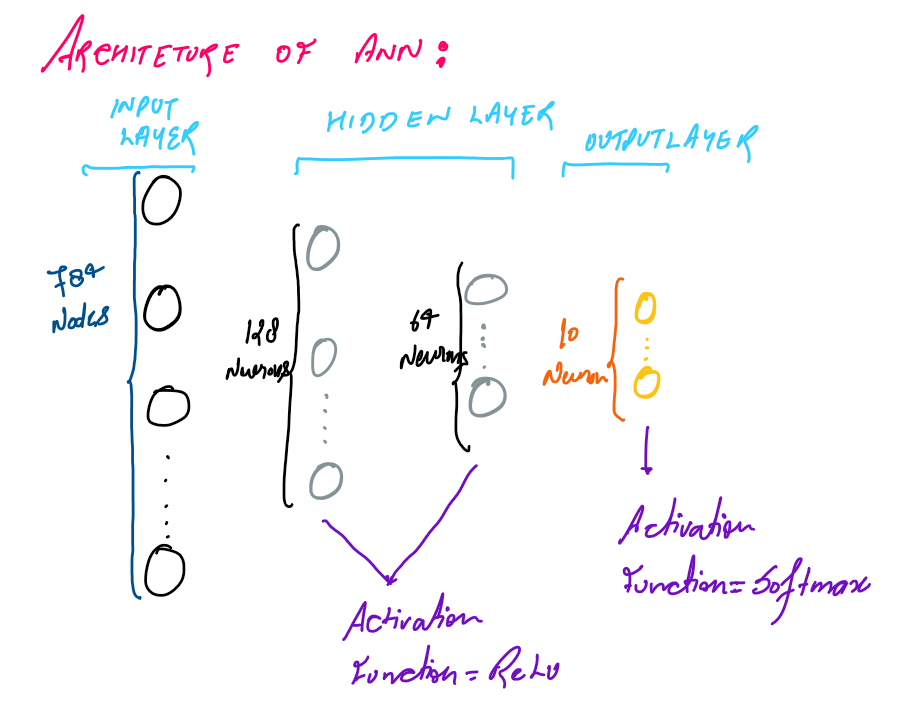

In [33]:
# Define neural network class
class MyNN(nn.Module):

    def __init__(self, num_features):

        # Call parent constructor
        super().__init__()
        # Define model architecture using nn.Sequential
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),  # Input to first hidden layer
            nn.ReLU(),
            nn.Linear(128, 64),           # First hidden to second hidden
            nn.ReLU(),
            nn.Linear(64, 10)            # Second hidden to output layer (10 classes)
            # Softmax is handled internally by CrossEntropyLoss
            # Here explicityly we do not need to define the Softmax activation function for the output layer
            # It is implimented by deafult in the CrossEntropyLoss, internally.
        )

    def forward(self, x):
        # Forward pass through the model
        return self.model(x)

## **12. Set Training Hyperparameters**
Specify the learning rate and number of epochs for model training.

In [34]:
# Set number of epochs and learning rate
epochs = 100

learning_rate = 0.1

## **13. Model, Loss Function, and Optimizer**
Instantiate the model, define the loss function (CrossEntropyLoss), and set up the optimizer (SGD).

In [35]:
# Instantiate the model
model = MyNN(X_train.shape[1])

# Define loss function (CrossEntropy for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(
    model.parameters(), 
    lr=learning_rate
)

## **14. Training Loop**
Iterate over epochs and batches, performing forward and backward passes, updating model parameters, and printing the average loss for each epoch.

In [36]:
# Training loop
for epoch in range(epochs):

    total_epoch_loss = 0

    for batch_features, batch_labels in train_loader:

        # Forward pass: compute outputs
        outputs = model(batch_features)

        # Compute loss
        loss = criterion(outputs, batch_labels)

        # Zero gradients before backward pass
        optimizer.zero_grad()
        # Backward pass: compute gradients
        loss.backward()

        # Update model parameters
        optimizer.step()

        # Accumulate batch loss
        total_epoch_loss = total_epoch_loss + loss.item()

    # Calculate average loss for the epoch
    avg_loss = total_epoch_loss/len(train_loader)
    
    # Print epoch and average loss
    print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 1.3216368520259858
Epoch: 2 , Loss: 0.7793365579843521
Epoch: 3 , Loss: 0.6427524695793788
Epoch: 4 , Loss: 0.5751657489935557
Epoch: 5 , Loss: 0.5281801910201709
Epoch: 6 , Loss: 0.4952874990304311
Epoch: 7 , Loss: 0.46024329950412113
Epoch: 8 , Loss: 0.43594589988390603
Epoch: 9 , Loss: 0.4182921428481738
Epoch: 10 , Loss: 0.3984092238545418
Epoch: 11 , Loss: 0.38502645591894785
Epoch: 12 , Loss: 0.372268552283446
Epoch: 13 , Loss: 0.34773620883623757
Epoch: 14 , Loss: 0.34672420596083003
Epoch: 15 , Loss: 0.31388126537203787
Epoch: 16 , Loss: 0.31264611408114434
Epoch: 17 , Loss: 0.2955209298928579
Epoch: 18 , Loss: 0.28571509405970574
Epoch: 19 , Loss: 0.27084775634109975
Epoch: 20 , Loss: 0.26237100263436636
Epoch: 21 , Loss: 0.25756084914008776
Epoch: 22 , Loss: 0.24232647344470024
Epoch: 23 , Loss: 0.2395794931302468
Epoch: 24 , Loss: 0.22613244988024234
Epoch: 25 , Loss: 0.22336848246554533
Epoch: 26 , Loss: 0.213457190990448
Epoch: 27 , Loss: 0.216944457938273

## **15. Set Model to Evaluation Mode**
Switch the model to evaluation mode to disable dropout and other training-specific layers.

In [37]:
# Set model to evaluation mode (disables dropout, etc.)
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

## **16. Model Evaluation**
After training, set the model to evaluation mode and compute the accuracy on the test set. For each batch, the model predicts the class labels, which are compared to the true labels to calculate the overall accuracy.

In [38]:
# Evaluation code
total = 0
correct = 0

with torch.no_grad():
    # Iterate over test batches
    for batch_features, batch_labels in test_loader:

        # Forward pass: get outputs
        outputs = model(batch_features)

        # Get predicted class (highest score)
        _, predicted = torch.max(outputs, 1)

        # Update total and correct counts
        total = total + batch_labels.shape[0]
        correct = correct + (predicted == batch_labels).sum().item()

# Print accuracy
print(correct/total)

0.8175
